# Student Details

- **Name**: Pranav Arora
- **Course**: COMP6934 Data Visualization
- **Assignment #**: 7

> Read PDF File to know more about the Assignment

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas
import folium

In [2]:
cdf = geopandas.read_file('canada.shp')
udf = geopandas.read_file('umbra_lo.shp')

### Getting Umbra CRS

In [3]:
udf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Changing cdf to EPSG:4326

In [4]:
cdf = cdf.to_crs("EPSG:4326")

In [5]:
cdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
cdf.head()

,GEO,Population,geometry
0,Newfoundland and Labrador,520553,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,Prince Edward Island,164318,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,Nova Scotia,992055,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,New Brunswick,789225,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,Quebec,8604495,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."


In [7]:
udf.head()

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry
0,16:38:50,59930,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-157.78564 -7.92730, -157.74170 -7.9..."
1,16:39:00,59940,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-156.02783 -7.44357, -155.98389 -7.4..."
2,16:39:10,59950,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-154.88525 -7.18078, -154.84131 -7.1..."
3,16:39:20,59960,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-153.65479 -6.96413, -153.61084 -6.9..."
4,16:39:30,59970,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-152.99561 -6.78739, -152.95166 -6.7..."


### Constructing a Dataframe having regions with 3 minutes(60 secs intervals)

In [8]:
udf['NLTSecs'] = udf['UTCSec'] - 9000 # Converting UTC secs to NL secs

In [9]:
interval_udf = pd.DataFrame()
init_sec = 51000

while init_sec <= 62630:
    interval_udf = pd.concat([interval_udf, udf[udf['NLTSecs'] == init_sec]])
    init_sec += 180

interval_udf = interval_udf.reset_index(drop=True)
interval_udf


,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry,NLTSecs
0,16:40:00,60000,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-151.50146 -6.34649, -151.45752 -6.3...",51000
1,16:43:00,60180,-146.06106,-5.27405,0,153.83,13.4,80.9,2.812,-0.111,339.23,358154.9,"POLYGON ((-145.34912 -4.49499, -145.30518 -4.4...",51180
2,16:46:00,60360,-141.39266,-3.78531,0,165.65,18.9,80.7,2.786,-0.111,339.23,357566.3,"POLYGON ((-140.60303 -3.00746, -140.55908 -3.0...",51360
3,16:49:00,60540,-138.00489,-2.47772,0,175.02,23.2,80.7,2.761,-0.112,339.23,357127.6,"POLYGON ((-137.83447 -1.72048, -137.79053 -1.7...",51540
4,16:52:00,60720,-135.27485,-1.26613,0,183.08,26.9,80.9,2.735,-0.112,339.23,356768.3,"POLYGON ((-135.02197 -0.49244, -134.97803 -0.4...",51720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,19:40:00,70800,-60.79226,47.66594,0,189.46,29.5,246.8,1.309,-0.115,339.25,356730.9,"POLYGON ((-60.13916 48.54813, -60.09521 48.553...",61800
61,19:43:00,70980,-56.65254,48.24385,0,181.72,26.2,250.7,1.283,-0.115,339.25,357053.7,"POLYGON ((-56.14014 49.07747, -56.09619 49.083...",61980
62,19:46:00,71160,-51.76839,48.72776,0,173.02,22.5,255.2,1.258,-0.115,339.25,357432.1,"POLYGON ((-50.51514 49.55049, -50.47119 49.550...",62160
63,19:49:00,71340,-45.72307,49.05781,0,162.85,18.1,260.6,1.232,-0.115,339.25,357897.3,"POLYGON ((-44.62646 49.81636, -44.58252 49.818...",62340


In [15]:
utc_time = interval_udf['UTCTime']
utc_time = pd.to_datetime(utc_time, format='%H:%M:%S')
interval_udf['NLTime'] = (utc_time - pd.Timedelta(hours=2, minutes=30)).dt.strftime('%H:%M:%S')
interval_udf

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,geometry,NLTSecs,NLTime
0,16:40:00,60000,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,"POLYGON ((-151.50146 -6.34649, -151.45752 -6.3...",51000,14:10:00
1,16:43:00,60180,-146.06106,-5.27405,0,153.83,13.4,80.9,2.812,-0.111,339.23,358154.9,"POLYGON ((-145.34912 -4.49499, -145.30518 -4.4...",51180,14:13:00
2,16:46:00,60360,-141.39266,-3.78531,0,165.65,18.9,80.7,2.786,-0.111,339.23,357566.3,"POLYGON ((-140.60303 -3.00746, -140.55908 -3.0...",51360,14:16:00
3,16:49:00,60540,-138.00489,-2.47772,0,175.02,23.2,80.7,2.761,-0.112,339.23,357127.6,"POLYGON ((-137.83447 -1.72048, -137.79053 -1.7...",51540,14:19:00
4,16:52:00,60720,-135.27485,-1.26613,0,183.08,26.9,80.9,2.735,-0.112,339.23,356768.3,"POLYGON ((-135.02197 -0.49244, -134.97803 -0.4...",51720,14:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,19:40:00,70800,-60.79226,47.66594,0,189.46,29.5,246.8,1.309,-0.115,339.25,356730.9,"POLYGON ((-60.13916 48.54813, -60.09521 48.553...",61800,17:10:00
61,19:43:00,70980,-56.65254,48.24385,0,181.72,26.2,250.7,1.283,-0.115,339.25,357053.7,"POLYGON ((-56.14014 49.07747, -56.09619 49.083...",61980,17:13:00
62,19:46:00,71160,-51.76839,48.72776,0,173.02,22.5,255.2,1.258,-0.115,339.25,357432.1,"POLYGON ((-50.51514 49.55049, -50.47119 49.550...",62160,17:16:00
63,19:49:00,71340,-45.72307,49.05781,0,162.85,18.1,260.6,1.232,-0.115,339.25,357897.3,"POLYGON ((-44.62646 49.81636, -44.58252 49.818...",62340,17:19:00


### Converting the `interval_udf` to GeoJSON format

In [11]:
interval_udf.to_file('interval_udf.geojson', driver='GeoJSON')

In [12]:
geo_udf = geopandas.read_file('interval_udf.geojson')
geo_udf

,UTCTime,UTCSec,CenterLon,CenterLat,CenterAlt,Duration,SunAlt,SunAz,MoonL,MoonB,MoonC,MoonDist,NLTSecs,NLTime,geometry
0,16:40:00,60000,-24.09575,48.14893,0,131.05,3.0,278.1,1.187,-0.115,339.25,359552.0,51000,14:10:00,"POLYGON ((-151.50146 -6.34649, -151.45752 -6.3..."
1,16:43:00,60180,-146.06106,-5.27405,0,153.83,13.4,80.9,2.812,-0.111,339.23,358154.9,51180,14:13:00,"POLYGON ((-145.34912 -4.49499, -145.30518 -4.4..."
2,16:46:00,60360,-141.39266,-3.78531,0,165.65,18.9,80.7,2.786,-0.111,339.23,357566.3,51360,14:16:00,"POLYGON ((-140.60303 -3.00746, -140.55908 -3.0..."
3,16:49:00,60540,-138.00489,-2.47772,0,175.02,23.2,80.7,2.761,-0.112,339.23,357127.6,51540,14:19:00,"POLYGON ((-137.83447 -1.72048, -137.79053 -1.7..."
4,16:52:00,60720,-135.27485,-1.26613,0,183.08,26.9,80.9,2.735,-0.112,339.23,356768.3,51720,14:22:00,"POLYGON ((-135.02197 -0.49244, -134.97803 -0.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,19:40:00,70800,-60.79226,47.66594,0,189.46,29.5,246.8,1.309,-0.115,339.25,356730.9,61800,17:10:00,"POLYGON ((-60.13916 48.54813, -60.09521 48.553..."
61,19:43:00,70980,-56.65254,48.24385,0,181.72,26.2,250.7,1.283,-0.115,339.25,357053.7,61980,17:13:00,"POLYGON ((-56.14014 49.07747, -56.09619 49.083..."
62,19:46:00,71160,-51.76839,48.72776,0,173.02,22.5,255.2,1.258,-0.115,339.25,357432.1,62160,17:16:00,"POLYGON ((-50.51514 49.55049, -50.47119 49.550..."
63,19:49:00,71340,-45.72307,49.05781,0,162.85,18.1,260.6,1.232,-0.115,339.25,357897.3,62340,17:19:00,"POLYGON ((-44.62646 49.81636, -44.58252 49.818..."


## Answer 1

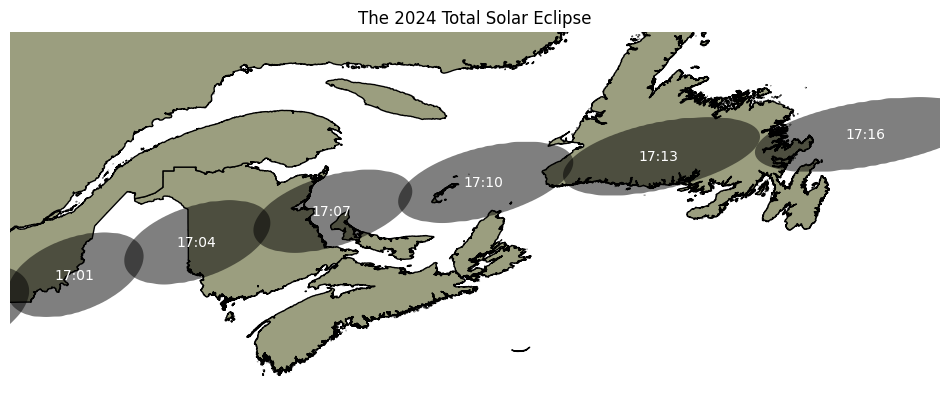

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

ax = cdf.head().plot(ax=ax, color='#9b9e7f', ec='k')
ax = geo_udf.plot(ax=ax, color='k', alpha=0.5)

ax.set_title('The 2024 Total Solar Eclipse')

for index, row in geo_udf.iterrows():
    center_lon = row['CenterLon']
    center_lat = row['CenterLat']
    if -72.0 < center_lon < -50.0:
        label_text = str(row['NLTime'])[:-3]
        ax.text(center_lon, center_lat, label_text, fontsize=10, ha='center', va='center', color='w')

ax.set_xlim((-72, -50))
ax.set_ylim((43, 51))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


## Answer 2

In [16]:
fmap = folium.Map(location=[47.6, -57.7], tiles="ESRI WorldTopoMap", zoom_start=6)

folium.GeoJson(
    geo_udf,
    name="The 2024 Total Solar Eclipse",
    color='gray',
    weight=1,
).add_to(fmap)

fmap

## Attributions

1. Professor's Lecture 26
2. GeoPandas - https://geopandas.org/en/stable/index.html
3. GeoDataFrame - https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
4. Pandas TimeDelta - https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html
5. Folium - https://pypi.org/project/folium/
6. GeoJSON - https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html